Nguyễn Thị Kiều Nhung 11203041


In [4]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

Bài 1:
Cho bài toán XOR
Implement thuật toán neural network để giải bài toán dùng Pytorch


In [41]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)

In [42]:
# Define Neural Net with one hidden layer

class XOR(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2) # Lớp ẩn với 2 đầu vào và 2 đầu ra
        self.lin2 = nn.Linear(2, output_dim) # Lớp đầu ra với 1 đầu ra

    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)
        x = self.lin2(x)
        return x

In [43]:
# Initialize neural net

model = XOR()

In [44]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [45]:
loss_func = nn.MSELoss() # hàm mất mát mean squared error
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9) # use stochastic fradient descent


In [46]:
%matplotlib inline
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)

        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()

    if i % 500 == 0:
        print (f"Epoch: {i}, Loss: {loss}, " ) # loss.item()

Epoch: 0, Loss: 0.7838085293769836, 
Epoch: 500, Loss: 6.351426236506086e-06, 
Epoch: 1000, Loss: 3.552713678800501e-15, 
Epoch: 1500, Loss: 2.2737367544323206e-13, 
Epoch: 2000, Loss: 1.7408297026122455e-13, 


In [47]:
model_params = list(model.parameters())
model_params

[Parameter containing:
 tensor([[-4.5659, -3.8210],
         [-1.5686, -1.4972]], requires_grad=True),
 Parameter containing:
 tensor([0.4162, 1.6951], requires_grad=True),
 Parameter containing:
 tensor([[-3.4091,  3.1961]], requires_grad=True),
 Parameter containing:
 tensor([-0.6461], requires_grad=True)]

In [48]:
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()
model_weights

array([[-4.565881 , -3.8209877],
       [-1.5685643, -1.4971693]], dtype=float32)

In [49]:
model_bias

array([0.41623864, 1.6951163 ], dtype=float32)

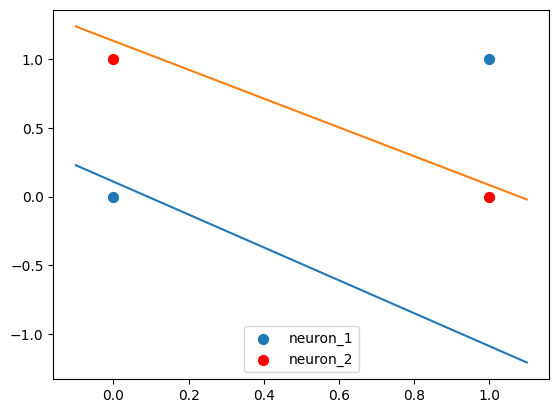

In [50]:
plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()

In [53]:
with torch.no_grad():
  predicted = model(X)

  print('y_hat:')
  for i in range(len(X)):
    print(print(f"Input: {X[i].tolist()}, Dự đoán: {predicted[i].tolist()[0]}, Thực tế: {Y[i].tolist()[0]}"))

y_hat:
Input: [0.0, 0.0], Dự đoán: 1.1920928955078125e-07, Thực tế: 0.0
None
Input: [0.0, 1.0], Dự đoán: 0.9999997615814209, Thực tế: 1.0
None
Input: [1.0, 0.0], Dự đoán: 0.9999998807907104, Thực tế: 1.0
None
Input: [1.0, 1.0], Dự đoán: 4.172325134277344e-07, Thực tế: 0.0
None


### Bài 2:
Cho dataset MNIST
* Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch
* Chỉnh learning rate, vẽ đồ thị loss tương ứng.
* Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.


Epoch [1/500], Loss: 2.2363
Epoch [51/500], Loss: 0.3341
Epoch [101/500], Loss: 0.2725
Epoch [151/500], Loss: 0.2348
Epoch [201/500], Loss: 0.2059
Epoch [251/500], Loss: 0.1824
Epoch [301/500], Loss: 0.1631
Epoch [351/500], Loss: 0.1470
Epoch [401/500], Loss: 0.1335
Epoch [451/500], Loss: 0.1221


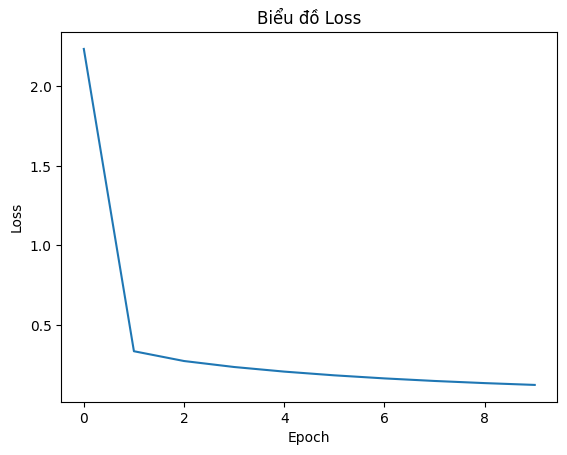

Accuracy of the network on the test images: 95.82%
Mean Squared Error: 0.7889
Root Mean Squared Error: 0.8882
Mean Absolute Error: 0.1593
Mean Absolute Percentage Error: nan


<ipython-input-37-fa9f1863c073>:27: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
<ipython-input-37-fa9f1863c073>:27: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [37]:
import torchvision
import torchvision.transforms as transforms

train_data = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)

from sklearn.metrics import mean_squared_error, mean_absolute_error

from torch.utils.data import Dataset, DataLoader, random_split
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size


# split
train, val = random_split(train_data, [train_size, val_size])

# Create DataLoaders for the training and validation sets
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val, batch_size=64, shuffle=False)

# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hàm hiển thị đồ thị loss
def plot_loss(loss_values):
    plt.plot(loss_values)
    plt.title('Biểu đồ Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Định nghĩa mạng neural network
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten ảnh
        x = self.lin1(x)
        x = self.relu(x)
        x = self.lin2(x)

        return x

# Khởi tạo mạng neural network
net = Net(784,128,10)

# Định nghĩa hàm mất mát và bộ tối ưu
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Huấn luyện mạng
num_epochs = 500
loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 50 == 0:
        # print (f"Epoch: {i}, Loss: {loss}, " ) # loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_dataloader):.4f}')
        loss_values.append(running_loss / len(train_dataloader))

# Vẽ đồ thị loss
plot_loss(loss_values)

# Đánh giá mô hình trên tập kiểm tra
net.eval()  # Đặt mô hình vào chế độ đánh giá
test_loss = 0.0
correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for data in val_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

# Tính các chỉ số đánh giá
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(np.array(y_true), np.array(y_pred))

print(f'Accuracy of the network on the test images: {(100 * correct / total):.2f}%')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Absolute Percentage Error: {mape:.4f}')


Bài 3:
Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4


softmax = exp(x) / sum(exp(x))
* It is a monotonic function, meaning that it always increases or decreases as its input increases. This is important because we want the softmax function to produce a probability distribution, and probabilities must always sum to 1.
* It is a differentiable function, meaning that it has a derivative that can be calculated. This is important because we need to be able to calculate the gradient of the softmax function in order to train neural networks using backpropagation.
* It is a non-negative function, meaning that it always outputs a non-negative value. This is important because probabilities must be non-negative.